# Horse Or Human , Copmuter Vision Clasification

In [1]:
# Horses Or Humans project

![Alt text](https://horsesandpeople.com.au/wp-content/uploads/2022/11/girl-horse-shutterstock.jpg)

In [3]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load the data
base_dir = "/kaggle/input/horses-or-humans-dataset/horse-or-human/"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Check horse train directory files and read images
horse_train_dir = os.path.join(train_dir, "horses")
horse_train_files = [img for img in os.listdir(horse_train_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
horse_train_images = [cv2.cvtColor(cv2.imread(os.path.join(horse_train_dir, img)), cv2.COLOR_BGR2RGB) for img in horse_train_files]

# Check human train directory files and read images
human_train_dir = os.path.join(train_dir, "humans")
human_train_files = [img for img in os.listdir(human_train_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
human_train_images = [cv2.cvtColor(cv2.imread(os.path.join(human_train_dir, img)), cv2.COLOR_BGR2RGB) for img in human_train_files]

# Check horse validation directory files and read images
horse_validation_dir = os.path.join(validation_dir, "horses")
horse_validation_files = [img for img in os.listdir(horse_validation_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
horse_validation_images = [cv2.cvtColor(cv2.imread(os.path.join(horse_validation_dir, img)), cv2.COLOR_BGR2RGB) for img in horse_validation_files]

# Check human validation directory files and read images
human_validation_dir = os.path.join(validation_dir, "humans")
human_validation_files = [img for img in os.listdir(human_validation_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
human_validation_images = [cv2.cvtColor(cv2.imread(os.path.join(human_validation_dir, img)), cv2.COLOR_BGR2RGB) for img in human_validation_files]


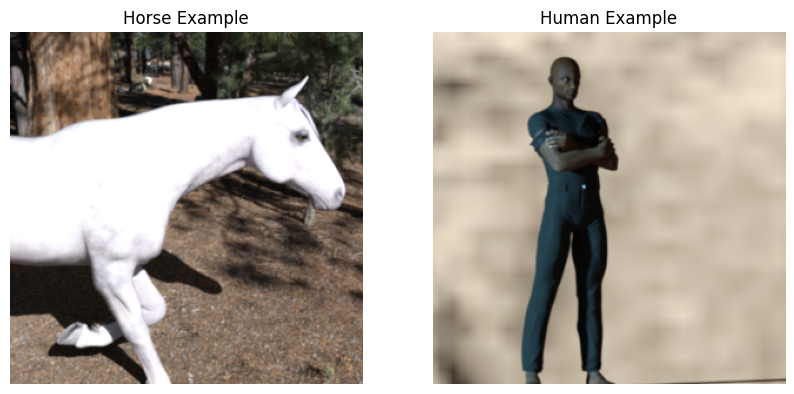

In [8]:
# A sample picture of both classes
horse_example = horse_train_images[0]
human_example = human_train_images[0]

# Show pictures
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(horse_example)
plt.title('Horse Example')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(human_example)
plt.title('Human Example')
plt.axis('off')

plt.show()


In [9]:
# size of pictures
img_size = (128, 128)

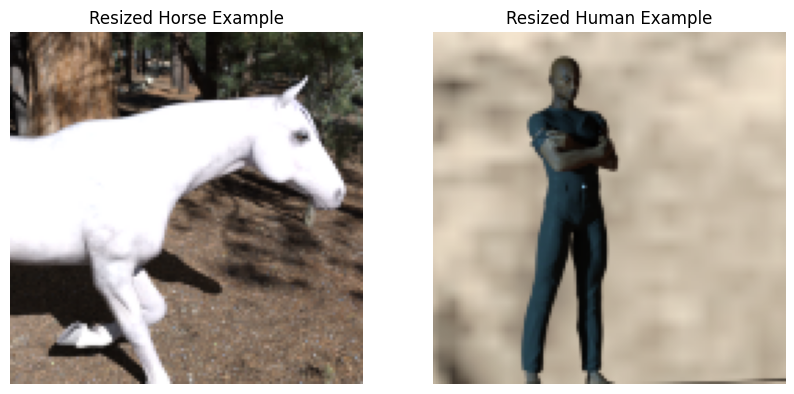

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cell images path on Kaggle
base_dir = "/kaggle/input/horses-or-humans-dataset/"
horse_dir = os.path.join(base_dir, "horse-or-human", "train", "horses")
human_dir = os.path.join(base_dir, "horse-or-human", "train", "humans")

# Size of pictures
img_size = (128, 128)

# Function to resize images
def resize_images(image_list):
    return [cv2.resize(image, img_size) for image in image_list]

# Check horse directory files and resize existing images
horse_files = [img for img in os.listdir(horse_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
horse_images = [cv2.cvtColor(cv2.imread(os.path.join(horse_dir, img)), cv2.COLOR_BGR2RGB) for img in horse_files]
horse_images_resized = resize_images(horse_images)

# Check human directory files and resize existing images
human_files = [img for img in os.listdir(human_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
human_images = [cv2.cvtColor(cv2.imread(os.path.join(human_dir, img)), cv2.COLOR_BGR2RGB) for img in human_files]
human_images_resized = resize_images(human_images)

# Example: Display the first resized image from each class
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(horse_images_resized[0])
plt.title('Resized Horse Example')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(human_images_resized[0])
plt.title('Resized Human Example')
plt.axis('off')

plt.show()


In [15]:
# Convert bike and car images to numpy arrays
horse_images_resized = np.array(horse_images_resized)
human_images_resized = np.array(human_images_resized)

# Prepare labels
horse_labels = np.ones(len(horse_images_resized))
human_labels = np.zeros(len(human_images_resized))

In [16]:
from sklearn.model_selection import train_test_split

# Concatenate bike and car images
all_images = np.concatenate([horse_images_resized, human_images_resized])

# Concatenate bike and car labels
all_labels = np.concatenate([horse_labels, human_labels])

# Data split
X_train, X_valid, y_train, y_valid = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Normalization
X_train = X_train / 255.0
X_valid = X_valid / 255.0


In [17]:
#chek data
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (821, 128, 128, 3)
X_valid shape: (206, 128, 128, 3)
y_train shape: (821,)
y_valid shape: (206,)


In [18]:
# mdoeling
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model compailing
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# mdoel summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [19]:
#model fiting
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
26/26 [==============================] - 15s 514ms/step - loss: 0.4958 - accuracy: 0.7613 - val_loss: 0.1274 - val_accuracy: 0.9466
Epoch 2/10
26/26 [==============================] - 13s 505ms/step - loss: 0.1370 - accuracy: 0.9440 - val_loss: 0.0375 - val_accuracy: 0.9854
Epoch 3/10
26/26 [==============================] - 13s 494ms/step - loss: 0.0393 - accuracy: 0.9903 - val_loss: 0.0130 - val_accuracy: 0.9951
Epoch 4/10
26/26 [==============================] - 13s 513ms/step - loss: 0.0096 - accuracy: 0.9976 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 5/10
26/26 [==============================] - 13s 498ms/step - loss: 0.0086 - accuracy: 0.9963 - val_loss: 0.3239 - val_accuracy: 0.9078
Epoch 6/10
26/26 [==============================] - 13s 512ms/step - loss: 0.1270 - accuracy: 0.9513 - val_loss: 0.1052 - val_accuracy: 0.9660
Epoch 7/10
26/26 [==============================] - 13s 491ms/step - loss: 0.0285 - accuracy: 0.9890 - val_loss: 0.0034 - val_accuracy: 1.0000

In [20]:
validation_loss, validation_accuracy = model.evaluate(X_valid, y_valid)

# Print the evaluation results
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')


7/7 [==============================] - 1s 124ms/step - loss: 0.0017 - accuracy: 1.0000
Validation Loss: 0.001671062083914876
Validation Accuracy: 1.0


In [21]:
#save model
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

In [22]:
#sources

Zafer Acar Notes , ["https://chat.openai.com/"]